## Data Structures and Algorithms Assignment 2
## Cian Belton 19321726 
## George Dagg 13459042

### Imports for this notebook:

In [94]:
import networkx as net
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import curve_fit

### Task 1: Sorting Algorithm Run Time and Complexity

- For each sorting algorithm, we first show that it works correctly. 
- We then test the algorithm on sequence sizes of increasing length.
- We record the running times and plot them against sequence length.

#### (1) Bubble Sort

- Bubble sort works by repeatedly iterating through the list, comparing adjacent elements and swapping them if they are in the wrong order. The algorithm continues to iterate through the list until no more swaps are needed, indicating that the list is sorted.

In [95]:
# Bubble Sort
# We first show that the Bubble Sort Algorithm works correctly

# Array sorted in reverse order
arr = [200, 196, 72, 55, 32, 24, 11, 4, 2, 0]

for i in range(len(arr)):
    print('Sweep', i)
    for j in range(len(arr) - i - 1):
        print('Checking {} against {}'.format(arr[j], arr[j + 1]))
        if arr[j] > arr[j + 1]:
            # swap
            print('Swapping {} with {}'.format(arr[j], arr[j + 1]))
            arr[j], arr[j + 1] = arr[j + 1], arr[j]
        else:
            print('Not swapping')

print('\n===========================================================')
print("Sorted array:", arr)

Sweep 0
Checking 200 against 196
Swapping 200 with 196
Checking 200 against 72
Swapping 200 with 72
Checking 200 against 55
Swapping 200 with 55
Checking 200 against 32
Swapping 200 with 32
Checking 200 against 24
Swapping 200 with 24
Checking 200 against 11
Swapping 200 with 11
Checking 200 against 4
Swapping 200 with 4
Checking 200 against 2
Swapping 200 with 2
Checking 200 against 0
Swapping 200 with 0
Sweep 1
Checking 196 against 72
Swapping 196 with 72
Checking 196 against 55
Swapping 196 with 55
Checking 196 against 32
Swapping 196 with 32
Checking 196 against 24
Swapping 196 with 24
Checking 196 against 11
Swapping 196 with 11
Checking 196 against 4
Swapping 196 with 4
Checking 196 against 2
Swapping 196 with 2
Checking 196 against 0
Swapping 196 with 0
Sweep 2
Checking 72 against 55
Swapping 72 with 55
Checking 72 against 32
Swapping 72 with 32
Checking 72 against 24
Swapping 72 with 24
Checking 72 against 11
Swapping 72 with 11
Checking 72 against 4
Swapping 72 with 4
Checking

In [96]:
# We now test the bubble sort algorithm against sequences of increasing length.
# Using list comprehension, for each iteration we build a new array with an increased length.
# We reverse the array and then perform the sort.
# We start with a sequence length of 1,000, and step in 500 increments towards 10,000.
# We record and plot the running times.

# We use this start, end, and step for testing each algorithm.
start = 1000
end = 10000
step = 500

bubble_sort_runtimes = []

for i in range(start, end, step):

    arr = [i for i in range(i)]
    arr.reverse()
    print('Testing sequence length = ', len(arr))

    start_time = time.time()
    if len(arr)<=1:
        continue
    else:
        for i in range(len(arr)):
            for j in range(len(arr) - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
    end_time = time.time()

    total_time = end_time - start_time
    bubble_sort_runtimes.append(total_time)

print('\n=================================================================')
print('BUBBLE SORT RUNNING TIMES:', bubble_sort_runtimes)

Testing sequence length =  1000
Testing sequence length =  1500
Testing sequence length =  2000
Testing sequence length =  2500
Testing sequence length =  3000
Testing sequence length =  3500
Testing sequence length =  4000
Testing sequence length =  4500
Testing sequence length =  5000
Testing sequence length =  5500
Testing sequence length =  6000
Testing sequence length =  6500
Testing sequence length =  7000
Testing sequence length =  7500
Testing sequence length =  8000
Testing sequence length =  8500
Testing sequence length =  9000
Testing sequence length =  9500

BUBBLE SORT RUNNING TIMES: [0.26429104804992676, 0.5587692260742188, 1.1225955486297607, 1.7573390007019043, 2.428326368331909, 3.306351900100708, 4.0616066455841064, 5.161309003829956, 6.416374444961548, 7.686885118484497, 9.15920901298523, 10.796269655227661, 12.620118141174316, 15.495164394378662, 17.71278166770935, 18.679726600646973, 20.693881273269653, 22.807077884674072]


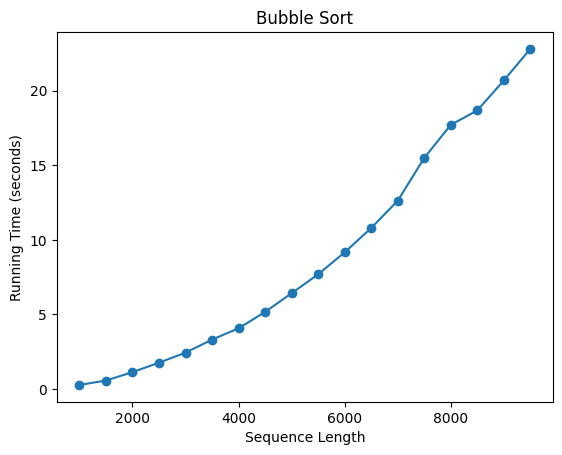

In [97]:
# Plotting Bubble Sort Running Times

x = list(range(start, end, step))
plt.plot(x, bubble_sort_runtimes, marker='o')
plt.title('Bubble Sort')
plt.xlabel('Sequence Length')
plt.ylabel('Running Time (seconds)')
plt.show()

#### Bubble Sort Results

- We can see from the plot that Bubble Sort has a quadratic time complexity (O(n^2)).
- The running time grows quadratically with the size of the input. 
- This means that if you double the size of the input, the time taken will be roughly four times as long.

#### (2) Quick Sort

- Quick sort is a divide-and-conquer sorting algorithm that selects a pivot element from the array and partitions the other elements into two groups, those less than the pivot and those greater than the pivot. The algorithm then recursively applies the same process to the two groups until the base case of a single-element group is reached.
- As the recursion starts to unwind, the sorted subarrays are combined in the return statement by concatenating the sorted left subarray, the pivot element, and the sorted right subarray.

In [98]:
# Quick Sort - Here we show that the Quick Sort algorithm works correctly.

# Sorted array in reverse order
arr = [200, 196, 72, 55, 32, 24, 11, 4, 2, 0]

def quick_sort(arr):
    if len(arr)<=1:
        return arr
    
    pivot = arr[len(arr)//2]
    arr.remove(pivot)
    left=[]
    right=[]

    for i in range(len(arr)):
        if arr[i] < pivot:
            left.append(arr[i])
        else:
            right.append(arr[i])

    return quick_sort(left) + [pivot] + quick_sort(right)

sorted_arr = quick_sort(arr)

print('\n=================================================================')
print("Sorted array:", sorted_arr)


Sorted array: [0, 2, 4, 11, 24, 32, 55, 72, 196, 200]


In [99]:
# We now test the algorithm against sequence lengths of increasing size, using the same method as before.
# This time we start with sequence length of 1,000, and step in 500 increments towards 10,000.
# We record and plot the running times.
# To try and limit spikes in the data, we run each sort 3 times and take an average.

quick_sort_runtimes = []

for i in range(start, end, step):

    print('Testing sequence length:', i)

    quick_sort_avg_runtime = []

    for _ in range(3):
        
        # Create and reverse the array
        arr = [_ for _ in range(i)]
        arr.reverse()

        start_time = time.time()
        quick_sort(arr)
        end_time = time.time()
        total_time = end_time - start_time
        quick_sort_avg_runtime.append(total_time)

    quick_sort_runtimes.append(sum(quick_sort_avg_runtime) / len(quick_sort_avg_runtime))

print('\n=================================================================')
print('QUICK SORT RUNNING TIMES:', quick_sort_runtimes)

Testing sequence length: 1000
Testing sequence length: 1500
Testing sequence length: 2000
Testing sequence length: 2500
Testing sequence length: 3000
Testing sequence length: 3500
Testing sequence length: 4000
Testing sequence length: 4500
Testing sequence length: 5000
Testing sequence length: 5500
Testing sequence length: 6000
Testing sequence length: 6500
Testing sequence length: 7000
Testing sequence length: 7500
Testing sequence length: 8000
Testing sequence length: 8500
Testing sequence length: 9000
Testing sequence length: 9500

QUICK SORT RUNNING TIMES: [0.002670764923095703, 0.003989299138387044, 0.0036574204762776694, 0.005651394526163737, 0.010294437408447266, 0.009319464365641275, 0.0093077023824056, 0.010627349217732748, 0.015639066696166992, 0.01960865656534831, 0.016289790471394856, 0.01595759391784668, 0.021278778711954754, 0.028586864471435547, 0.018284082412719727, 0.022923390070597332, 0.022286256154378254, 0.023595730463663738]


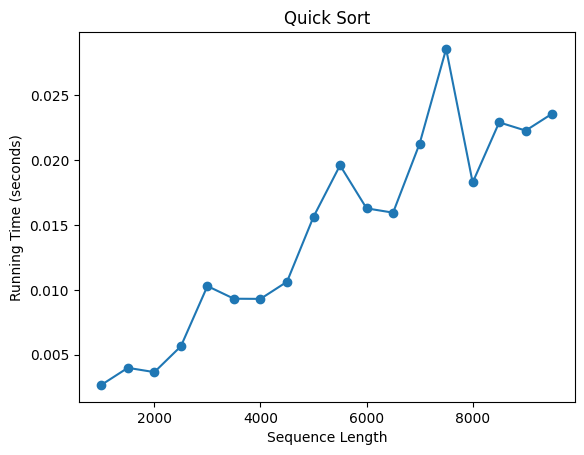

In [100]:
# Plotting Quick Sort Running Times

x = list(range(start, end, step))
plt.plot(x, quick_sort_runtimes, marker='o')
plt.title('Quick Sort')
plt.xlabel('Sequence Length')
plt.ylabel('Running Time (seconds)')
plt.show()

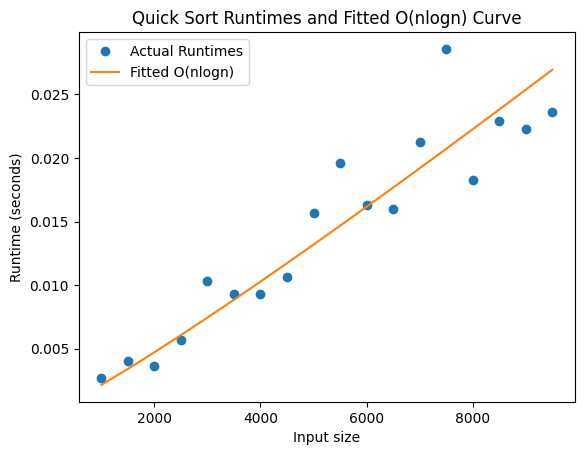

In [101]:
# Here we fit an O(nlogn) curve to our data to better understand the time complexity of our algorithm

def n_log_n_func(n, a):
    return a * n * np.log2(n)

input_sizes = np.array(list(range(start, end, step)))

# Fit the O(nlogn) function to the quick sort runtimes
params, _ = curve_fit(n_log_n_func, input_sizes, quick_sort_runtimes)

# Calculate the fitted O(nlogn) values
fitted_n_log_n = n_log_n_func(input_sizes, *params)

# Plot the actual runtimes and the fitted curve
plt.plot(input_sizes, quick_sort_runtimes, 'o', label='Actual Runtimes')
plt.plot(input_sizes, fitted_n_log_n, label='Fitted O(nlogn)')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.title('Quick Sort Runtimes and Fitted O(nlogn) Curve')
plt.show()


#### Quick Sort Results

- The best case time complexity for Quick Sort in O(nlogn). The worst case is O(n^2). Efficient pivot selection determines the success of the algorithm. Pivots that split the array as evenly as possible, will move the time complexity of the algorithm towards the optimum. Pivots selected from the start or end of the sequence split the array unevenly, resulting in a poorly balanced recursion tree and a time complexity closer to O(n^2).
- We can see from the runtime and curve fitting plot that our Quick Sort algorithm complexity is closer to O(nlogn) which is optimal. Selecting our pivot from the middle of the array each time supports this result.

#### (3) Merge Sort

- Merge sort is another divide-and-conquer sorting algorithm that recursively divides the input array into two halves, sorts each half independently, and then merges them back together in sorted order. The process of dividing the input array continues until the base case of a single element array is reached. The merging step combines the sorted halves by comparing their elements and placing them in the correct order.

In [102]:
# Merge Sort - Here we show that the merge sort algorithm works correctly

arr = [200, 196, 72, 55, 32, 24, 11, 4, 2, 0]

def merge_sort(arr):
    if len(arr) > 1:

        # Find the mid point
        mid = len(arr)//2

        # Split the array
        arr1 = arr[:mid]
        arr2 = arr[mid:]   

        # Recursively sort each half
        merge_sort(arr1)
        merge_sort(arr2) 

        # Remove all elements from the array
        arr.clear()  

        # Merge sorted halves back into the array
        while len(arr1) > 0 and len(arr2) > 0:   
            if arr1[0] <= arr2[0]:  
                arr.append(arr1.pop(0))
            else:
                arr.append(arr2.pop(0))

        while len(arr1) > 0:
            arr.append(arr1.pop(0))

        while len(arr2) > 0:
            arr.append(arr2.pop(0))
            
    return arr


sorted_arr = merge_sort(arr)

print("Sorted array:", sorted_arr)

Sorted array: [0, 2, 4, 11, 24, 32, 55, 72, 196, 200]


In [103]:
# We now test the algorithm against sequence lengths of increasing size, using the same method as before.
# This time we start with sequence length of 1,000, and step in 500 increments towards 10,000
# We record and plot the running times.
# To try and limit spikes in the data, we run each sort 3 times and take an average.

merge_sort_runtimes = []

for i in range(start, end, step):

    print('Testing array length = ', len(arr))

    merge_sort_avg_runtime = []
    for _ in range(3):
        arr = [_ for _ in range(i)]
        arr.reverse()

        start_time = time.time()
        merge_sort(arr)
        end_time = time.time()
        total_time = end_time - start_time
        merge_sort_avg_runtime.append(total_time)
    merge_sort_runtimes.append(sum(merge_sort_avg_runtime)/len(merge_sort_avg_runtime))
    
print('=================================================================')
print('MERGE SORT RUNNING TIMES:', merge_sort_runtimes)

Testing array length =  10
Testing array length =  1000
Testing array length =  1500
Testing array length =  2000
Testing array length =  2500
Testing array length =  3000
Testing array length =  3500
Testing array length =  4000
Testing array length =  4500
Testing array length =  5000
Testing array length =  5500
Testing array length =  6000
Testing array length =  6500
Testing array length =  7000
Testing array length =  7500
Testing array length =  8000
Testing array length =  8500
Testing array length =  9000
MERGE SORT RUNNING TIMES: [0.0065765380859375, 0.007567564646402995, 0.00876148541768392, 0.011459668477376303, 0.013397773106892904, 0.017681360244750977, 0.024939934412638348, 0.029254833857218426, 0.030250072479248047, 0.028049151102701824, 0.0298003355662028, 0.033368190129597984, 0.04414995511372884, 0.04888010025024414, 0.04421695073445638, 0.04554271697998047, 0.05153735478719076, 0.07147860527038574]


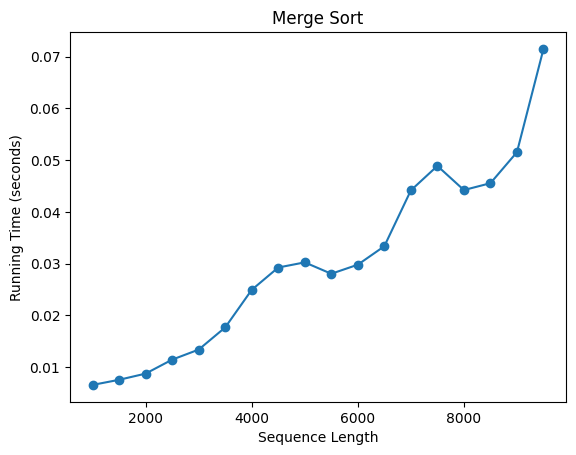

In [104]:
# Plotting Merge Sort Running Times

x = list(range(start, end, step))
plt.plot(x, merge_sort_runtimes, marker='o')
plt.title('Merge Sort')
plt.xlabel('Sequence Length')
plt.ylabel('Running Time (seconds)')
plt.show()

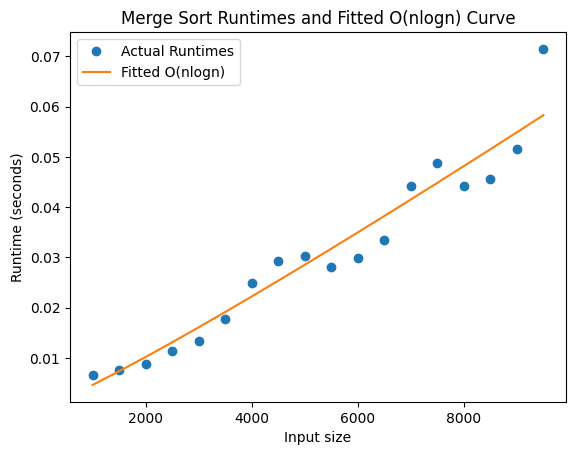

In [105]:
# Here we fit an O(nlogn) curve to our data to better understand the time complexity of our algorithm

input_sizes = np.array(list(range(start, end, step)))

# Fit the O(nlogn) function to the merge sort runtimes
params, _ = curve_fit(n_log_n_func, input_sizes, merge_sort_runtimes)

# Calculate the fitted O(nlogn) values
fitted_n_log_n = n_log_n_func(input_sizes, *params)

# Plot the actual runtimes and the fitted curve
plt.plot(input_sizes, merge_sort_runtimes, 'o', label='Actual Runtimes')
plt.plot(input_sizes, fitted_n_log_n, label='Fitted O(nlogn)')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.title('Merge Sort Runtimes and Fitted O(nlogn) Curve')
plt.show()

### Merge Sort Results

- The run time for merge sort algorithms is O(nlogn).
- We can see from our runtimes and the fitted curve that our algorithm works as expected.

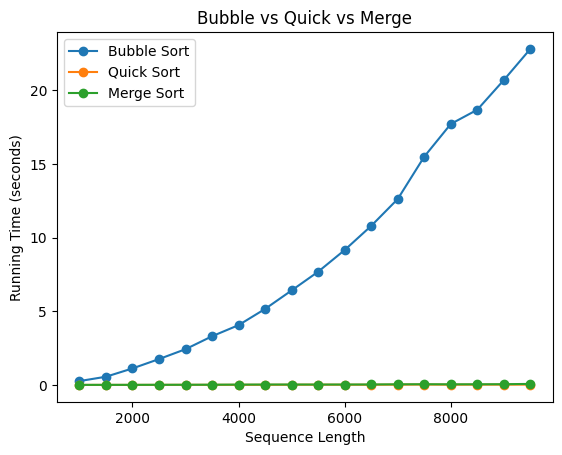

In [107]:
# Plotting Bubble vs Quick vs Merge

x = list(range(start, end, step))
plt.plot(x, bubble_sort_runtimes, marker='o', label='Bubble Sort')
plt.plot(x, quick_sort_runtimes, marker='o', label='Quick Sort')
plt.plot(x, merge_sort_runtimes, marker='o', label='Merge Sort')
plt.title('Bubble vs Quick vs Merge')
plt.xlabel('Sequence Length')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

- In this comparison, Bubble sort demonstrates the least efficient performance among the three algorithms, owing to its quadratic time complexity of O(n^2). This means that as the input size grows, its execution time increases significantly.
- Quick sort and Merge sort exhibit comparable performance levels, which is consistent with their shared time complexity of O(nlogn). As a result, both algorithms scale better with larger input sizes, maintaining relatively faster execution times compared to Bubble sort.

### Task 2: Shortest Path (Dijkstra's) Algorithm and Graphs

The following image is the step through of Dijkstraâs algorithm for the provided graph to go from vertex A to vertex G.
The key is as follows:
- Each vertex that has been visited is added to 'Visited:' with the most recent addition the current vertex.
- The lowest total distance currently for each node is underlined in red beside each node.
- The best path known so far to each node is highlighted in yellow.
- Note for the sake of brevity I did not include any nodes that were at infinity, so any nodes not included in the first 4 images are at infinity.

<img src="dijkstra_by_hand.jpg">


#### Discussion of results:
From the image above it is clear that there were many changes for the shortest paths in this weighted graph. This can be easily seen in the change of where the highlighted lines are. G for example had 3 different weights depending on the stage of the algorithm: 29, 26 and 25.

#### Verification of results with code
#### Weighted Graph 

In [ ]:
#create an empty weighted graph
G = net.Graph()

#adding nodes to the graph
G.add_nodes_from(['A','B','C','D','E','F'])

#add weighted edges
G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'H', weight=8)
G.add_edge('A', 'E', weight=9)
G.add_edge('B', 'H', weight=4)
G.add_edge('B', 'C', weight=12)
G.add_edge('B', 'D', weight=15)
G.add_edge('C', 'D', weight=3)
G.add_edge('C', 'G', weight=11)
G.add_edge('D', 'G', weight=9)
G.add_edge('C', 'F', weight=1)
G.add_edge('F', 'G', weight=13)
G.add_edge('E', 'F', weight=4)
G.add_edge('E', 'G', weight=20)
G.add_edge('E', 'H', weight=5)
G.add_edge('C', 'H', weight=7)
G.add_edge('H', 'F', weight=6)

#draw the graph
pos= {'A': [0, -0.2], 'B': [0.2,  0], 'C': [0.4,-.33], 'D': [0.5, 0], 'E': [0.05, -0.8], 'F': [0.3, -0.6], 'G': [0.5,-0.8], 'H': [ 0.18, -0.4]}
net.draw_networkx(G, pos, with_labels= True, node_color= 'red', node_size= 500)
edge_labels = net.get_edge_attributes(G, 'weight')
d=net.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
#add a title
plt.title('Weighted Graph G')
plt.show()


#### Dijkstra's Algorithm

In [ ]:
#dijkstra's algorithm
#print the shortest path from A to all nodes using dijkstra_path
#print the minimum distance from A to all nodes using dijkstra_path_length
for node in G.nodes():
    print("Shortest path from A to ", node, " is: ", net.dijkstra_path(G, 'A', node))
    print("Minimum distance from A to ", node, " is: ", net.dijkstra_path_length(G, 'A', node))
    print("----------------------------------------------------------")

#### Graph of shortest path tree

In [ ]:

#compute all shortest paths and distances using Dijkstra's algorithm
shortest_paths = net.single_source_dijkstra_path(G, 'A')

#create a new graph with only the edges in the shortest path tree
S = net.Graph()
for node, path in shortest_paths.items():
    for i in range( len(path)-1 ):
        ##add the edge with the weight to the new graph
        S.add_edge(path[i], path[i+1], weight=G[path[i]][path[i+1]]['weight'])

#draw the shortest path tree, use same positions as original graph
net.draw_networkx(S, pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(S, 'weight')
net.draw_networkx_edge_labels(S, pos=pos, edge_labels=edge_labels)
#add a title
plt.title('Shortest Path Tree')
plt.show()

#### Discussion of results:
- The code above verifies our hand-drawn solution for task 2.
- The minimum distance from A to each node is the same as computed by hand.
- The shotest path from A to each node is the same as drawn by hand.
- Using networkx is a very useful tool for analysing and creating graphs.

### Task 3: Minimum Spanning Tree (MST) using Prim's Algorithm


The following image is the step through of Prim's algorithm to find the Minimum Spanning Tree to connect the 8 islands in the lake.
The key is as follows:
- Each vertex that has been visited is added to 'Visited:' with the most recent addition the current vertex.
- The distance of each node from root is underlined in red at each stage
- The MST is highlighted in yellow incrementally
- Note for the sake of brevity, in step 4 of this image I decided to only draw edges that were below 200 weight and were connecting to neighbours (the reason why the edge from 6->7 only appeared in step 7). Another reason for this was that many of the edges were redundant, this will be illustrated below.

<img src="prim_by_hand_1.jpg">

#### Clearer MST and Drawing Of All Edges:
- The follwing image contains a sketch of the MST in a more ordered fashion.
- It also contains the graph of the 8 islands with all the bridge possibilities drawn.
- The MST is drawn on the graph of the islands for clarity. 
- The aim of this drawing was to illustrate my point for only drawing edges that had a viable option of being in the MST (weight <200) as it is clear that there would have been significant extra (largely pointless) work in drawing a graph of all possible edges for every step.

<img src="prim_by_hand_2.jpg">

#### Discussion of results:
These results display the minimum spanning tree to build bridges between each island in the lake. A difference with the MST in comparison with the shortest path algorithm is: once an edge is added to the tree it is not removed.


#### Verification of results with code

#### Weighted Graph

In [ ]:
#create an empty weighted graph
G = net.Graph()

#adding nodes to the graph
G.add_nodes_from(['1','2','3','4','5','6','7','8'])

#add weighted edges
G.add_edge('1', '2', weight=240)
G.add_edge('1', '3', weight=210)
G.add_edge('1', '4', weight=340)
G.add_edge('1', '5', weight=280)
G.add_edge('1', '6', weight=200)
G.add_edge('1', '7', weight=345)
G.add_edge('1', '8', weight=120)
G.add_edge('2', '3', weight=265)
G.add_edge('2', '4', weight=175)
G.add_edge('2', '5', weight=215)
G.add_edge('2', '6', weight=180)
G.add_edge('2', '7', weight=185)
G.add_edge('2', '8', weight=155)
G.add_edge('3', '4', weight=260)
G.add_edge('3', '5', weight=115)
G.add_edge('3', '6', weight=350)
G.add_edge('3', '7', weight=435)
G.add_edge('3', '8', weight=195)
G.add_edge('4', '5', weight=160)
G.add_edge('4', '6', weight=330)
G.add_edge('4', '7', weight=295)
G.add_edge('4', '8', weight=230)
G.add_edge('5', '6', weight=360)
G.add_edge('5', '7', weight=400)
G.add_edge('5', '8', weight=170)
G.add_edge('6', '7', weight=175)
G.add_edge('6', '8', weight=205)
G.add_edge('7', '8', weight=305)

#draw the graph in a circular layout starting at -180 degrees
pos = net.circular_layout(G)
angle = np.deg2rad(-180)
#create a matrix to rotate the nodes
rot_matrix = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
#rotate the nodes using the dot product to find the new positions
pos = {node: rot_matrix.dot(pos[node]) for node in G.nodes()}
#reverse the order of the nodes
new_pos = {}
nodes = list(G.nodes())[::-1]
#assign the new positions to the nodes
for i, node in enumerate(nodes):
    new_pos[node] = pos[nodes[-1 - i]]

net.draw_networkx(G, new_pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(G, 'weight')
d = net.draw_networkx_edge_labels(G, pos=new_pos, edge_labels=edge_labels)
#add a title
plt.title('Weighted Graph G')
plt.show()

#### Prim's algorithm:

In [ ]:
#prim's algorithm
#print the minimum spanning tree
mst = net.minimum_spanning_tree(G)
mst_edges = list(mst.edges())
print("Minimum Spanning Tree Edges: ", mst_edges)


#### MST Graph:

In [ ]:
#create a new graph with only the edges in the minimum spanning tree
N=net.Graph()
for edge in mst_edges:
    N.add_edge(edge[0], edge[1], weight=G[edge[0]][edge[1]]['weight'])

#draw the minimum spanning tree
net.draw_networkx(N, new_pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(N, 'weight')
net.draw_networkx_edge_labels(N, pos=new_pos, edge_labels=edge_labels)
#add a title
plt.title('Minimum Spanning Tree')
plt.show()

#### Discussion of results:
- The code above verifies our hand-drawn solution for task 3.
- The minimum spanning tree with 1 as root is the same as computed by hand.
- Using networkx is a very useful tool for analysing and creating graphs.